# 4장. 가장 훌륭한 예측선

## 4. 파이썬 코딩으로 확인하는 최소 제곱

### 1. 환경 준비

In [1]:
import numpy as np

### 2. 데이터 준비

In [3]:
# 데이터 준비: x는 하루 근무 시간, y는 업무 성과 점수 numpy 배열 준비
x = np.array([3, 5, 7, 9, 11]) #x는 독립 변수(근무 시간 데이터)
y = np.array([55, 70, 85, 95, 100]) #y는 종속 변수 (업무 성과 점수 데이터)

#### [x와 y의 평균값]

In [4]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 7.0
y의 평균값: 81.0


#### [기울기 공식의 분모와 분자]

In [5]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 40.0
분자: 230.0


### 3. 기울기와 y 절편 구하기

In [6]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)
y_LSM = a * x + b # 최소제곱법(LSM)으로 구한 선형회귀선

기울기 a = 5.75
y절편 b = 40.75


## 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

### 1. 환경 준비

In [7]:
import numpy as np

### 2. 데이터 준비

In [11]:
# 가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=92/10 #학번의 마지막 두 자리 /10
fake_b=22/2 #학번의 앞 두 자리 /2

# 공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([3, 5, 7, 9, 11]) #x는 독립 변수(근무 시간 데이터)
y = np.array([55, 70, 85, 95, 100]) #y는 종속 변수 (업무 성과 점수 데이터)

### 3. 평균 제곱 오차 구하기

In [12]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x 값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=3, 실제점수=55, 예측점수=39
공부시간=5, 실제점수=70, 예측점수=57
공부시간=7, 실제점수=85, 예측점수=75
공부시간=9, 실제점수=95, 예측점수=94
공부시간=11, 실제점수=100, 예측점수=112


In [13]:
# 평균 제곱 오차 함수를 각 y 값에 대입하여 최종 값을 구하는 함수입니다.
n=len(x)
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y,predict_result)))

평균 제곱 오차: 136.08


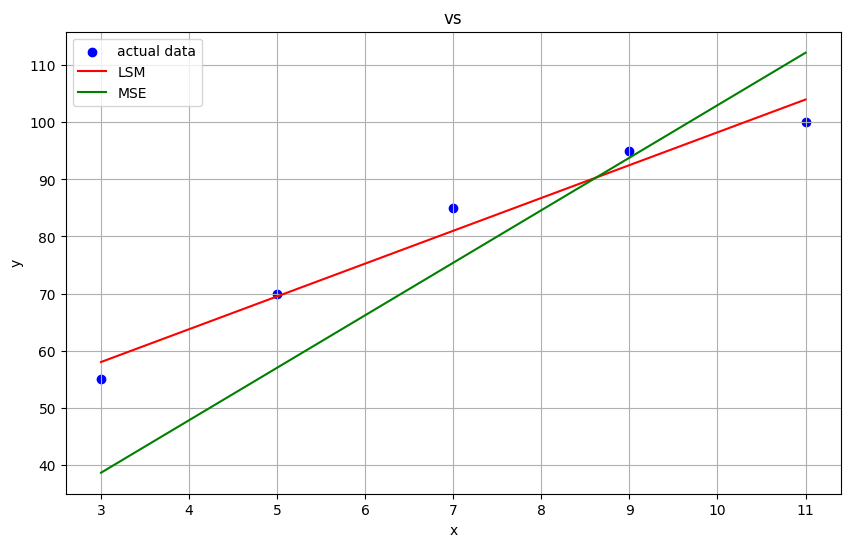

In [15]:
import matplotlib.pyplot as plt
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='actual data', color='blue')  # 실제 데이터 산점도

# 최소 제곱법 회귀선 그리기
plt.plot(x, y_LSM, label='LSM', color='red')

# 맞춤 회귀선 그리기
plt.plot(x, predict_result, label='MSE', color='green')

# 그래프 표시
plt.xlabel('x')
plt.ylabel('y')
plt.title('vs')
plt.legend()
plt.grid(True)
plt.show()